# Project HR

Predict attrition of your valuable employees

[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.shape # Attrition, PerformanceRating

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# df.isnull().sum().plot(kind="bar", title="Missing Values")
import plotly.graph_objects as go
fig = go.Figure([go.Bar(
                x=df.isnull().sum().index, 
                y=df.isnull().sum())
                ])
fig.update_layout(title='NaN values by column', width=1200)
fig.show()

In [7]:
for i in df:
    print('\n')
    print('*************************************************************')
    print('Column name', i, '      column type', df[i].dtypes)
    print(df[i].unique())



*************************************************************
Column name Age       column type int64
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


*************************************************************
Column name Attrition       column type object
['Yes' 'No']


*************************************************************
Column name BusinessTravel       column type object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


*************************************************************
Column name DailyRate       column type int64
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 13

In [8]:
# drop unneccesary columns: EmployeeNumber, DailyRate
columns_to_drop = ['DailyRate', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

def removeColumns(columns):
    for i in columns:
        if i in df:
            df.drop(i, inplace=True, axis=1)

removeColumns(columns_to_drop)

In [9]:
df.shape

(1470, 30)

In [10]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
# get only numerical and analize them
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = df.select_dtypes(include=numerics)

category = df.select_dtypes(include=object)

In [12]:
numeric.iloc[:,:12].head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike
0,41,1,2,2,94,3,2,4,5993,19479,8,11
1,49,8,1,3,61,2,2,2,5130,24907,1,23
2,37,2,2,4,92,2,1,3,2090,2396,6,15
3,33,3,4,4,56,3,1,3,2909,23159,1,11
4,27,2,1,1,40,3,1,2,3468,16632,9,12


# EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

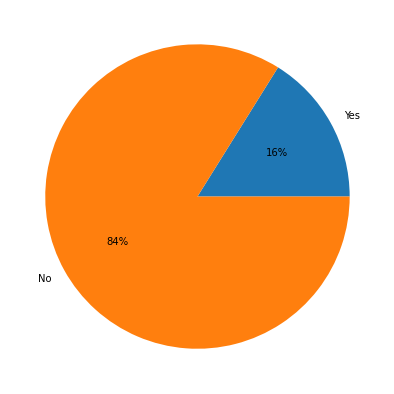

In [15]:
plt.figure(figsize = (7,7))
NO, YES = df['Attrition'].value_counts()[0], df['Attrition'].value_counts()[1]
data = [YES / (NO + YES) * 100, NO / (NO + YES) * 100]
plt.pie(data, labels = ['Yes', 'No'], autopct='%.0f%%')
plt.show()

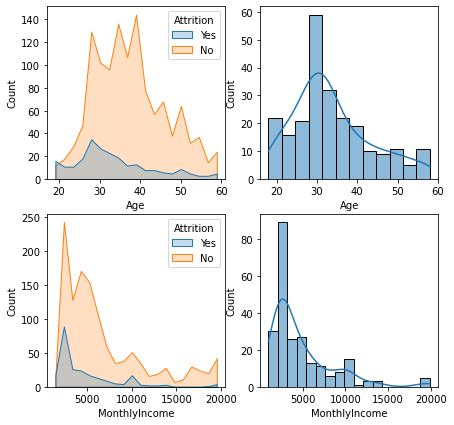

In [16]:
plt.figure(figsize = (7,7))

subplot(2,2,1)
sns.histplot(df, x="Age", hue="Attrition", element="poly")

subplot(2,2,2)
sns.histplot(data=df[df.Attrition == 'Yes'], x="Age", kde=True)

subplot(2,2,3)
sns.histplot(df, x="MonthlyIncome", hue="Attrition", element="poly")

subplot(2,2,4)
sns.histplot(data=df[df.Attrition == 'Yes'], x="MonthlyIncome",  kde=True)

plt.show()


In [17]:
#ax = sns.barplot(x="day", y="total_bill", hue="Gender", data=df)

# Start applying Modeling

In [18]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Plan of attack:

* More plots
* Split
* Tree
* Random
* Adaboots: https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f
* Ensamble
* 


In [19]:
## Experimental Split data on and on without errors in notebook

# def splitDataset():
#     X = df.copy()
#     y = ''
#     if 'Attrition' in X:
#         y = df.Attrition
#         X.pop('Attrition')
#     return X, y

# X, y = splitDataset()

In [20]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [21]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [22]:
for i in df:
    print('Column name:', i, '\t\t\t\ttype:', df[i].dtypes)

Column name: Age 				type: int64
Column name: Attrition 				type: object
Column name: BusinessTravel 				type: object
Column name: Department 				type: object
Column name: DistanceFromHome 				type: int64
Column name: Education 				type: int64
Column name: EducationField 				type: object
Column name: EnvironmentSatisfaction 				type: int64
Column name: Gender 				type: object
Column name: HourlyRate 				type: int64
Column name: JobInvolvement 				type: int64
Column name: JobLevel 				type: int64
Column name: JobRole 				type: object
Column name: JobSatisfaction 				type: int64
Column name: MaritalStatus 				type: object
Column name: MonthlyIncome 				type: int64
Column name: MonthlyRate 				type: int64
Column name: NumCompaniesWorked 				type: int64
Column name: OverTime 				type: object
Column name: PercentSalaryHike 				type: int64
Column name: PerformanceRating 				type: int64
Column name: RelationshipSatisfaction 				type: int64
Column name: StockOptionLevel 				type: int64
Column 

In [23]:
# select categorical and numerical features
df.select_dtypes(['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [24]:
bustra = pd.get_dummies(X['BusinessTravel'], prefix='BusinessTravel')
bustra.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [68]:
# gender = pd.get_dummies(df.Gender, prefix='Gender')
# job_role = pd.get_dummies(df.JobRole, prefix='JobRole')
# marital_status = pd.get_dummies(df.MaritalStatus, prefix='MaritalStatus') 
# over_time = pd.get_dummies(df.OverTime, prefix='OverTime')
# buss_travel = pd.get_dummies(df.BusinessTravel, prefix='BusinessTravel')
# dept = pd.get_dummies(df.Department, prefix='Department') 
# educ_field = pd.get_dummies(df.EducationField, prefix='EducationField')

# df_onehot = pd.concat([gender, 
#                     job_role, 
#                     marital_status, 
#                     over_time, 
#                     buss_travel, 
#                     dept, 
#                     educ_field, 
#                     df.select_dtypes(['int64'])], axis=1)

def onehot():
    """Encode categorical and combine categorical and numerical in one df"""
    new_list = [df.select_dtypes(['int64'])]
    for i in X.select_dtypes(['object']).columns:
        temp = pd.get_dummies(X[i], prefix=i)
        new_list.append(temp)
    return pd.concat(new_list, axis=1)
    
df_ = onehot()


In [26]:
# ax = sns.heatmap(numeric.iloc[:,:12], annot=True, fmt="d")
df_.shape

(1470, 50)

## LabelBinarizer
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

* Note: Dont need Binarizer with xgboost classifier. Turn the categorical target to True or False? 

In [27]:
from sklearn import preprocessing
bin = preprocessing.LabelBinarizer()

In [28]:
y = bin.fit_transform(y)
print(np.unique(y), y.shape) # now is a numpy

[0 1] (1470, 1)


# Decision Tree

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(df_, y)


In [30]:
tree_cl1 = DecisionTreeClassifier(random_state=42) 

In [31]:
tree_cl1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# test in sample
# very high at first glance, do we have overfitting?
print(
    'accuracy_score', accuracy_score(y_train, tree_cl1.predict(X_train)),'\n',
    'classification_report\n', classification_report(y_train, tree_cl1.predict(X_train)), '\n',
    'confusion matrix\n', confusion_matrix(y_train, tree_cl1.predict(X_train))
)

accuracy_score 1.0 
 classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102
 
 confusion matrix
 [[924   0]
 [  0 178]]


In [33]:
# We have overfitting
print(
    'accuracy_score: ', accuracy_score(y_test, tree_cl1.predict(X_test)),'\n',
    'classification_report\n', classification_report(y_test, tree_cl1.predict(X_test)), '\n',
    'confusion matrix\n', confusion_matrix(y_test, tree_cl1.predict(X_test))
)

accuracy_score:  0.7527173913043478 
 classification_report
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       309
           1       0.25      0.27      0.26        59

    accuracy                           0.75       368
   macro avg       0.55      0.56      0.56       368
weighted avg       0.76      0.75      0.76       368
 
 confusion matrix
 [[261  48]
 [ 43  16]]


In [ ]:
# from sklearn.model_selection import cross_validate
# from sklearn.datasets import  load_iris
# from sklearn.svm import SVC

# iris = load_iris()
# clf = SVC()
# scoring = {'acc': 'accuracy',
#            'prec_macro': 'precision_macro',
#            'rec_micro': 'recall_macro'}
# scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
#                          cv=5, return_train_score=True)
# print(scores.keys())
# print(scores['test_acc']) 

In [108]:
## agnosctic function for train and test scores for all model classifiers
def scores(cl, X_train, y_train, X_test, y_test, train=True, cv=2): 
    """ render accuracy, classification report and confusion matrix scores for train and test
        in order to compare them
        cl: as classifier (Tree, RandomForest, etc)
    """
    if train:
        print('\n***************************** Training ****************************************************')
        print(f'Accuracy:\t\t {accuracy_score(y_train, cl.predict(X_train))} \n')
        print(f'Classification Report:\n {classification_report(y_train, cl.predict(X_train))}')
        print(f'Confusion Matrix:\n {confusion_matrix(y_train, cl.predict(X_train))}')
        print("*************************** ",cv)
        cv_score = cross_val_score(cl, X_train, y_train, cv=cv, scoring='accuracy')
        print('Accu accuracy:', np.mean(cv_score))
        print('Accu standard dev:', np.std(cv_score))
        
    else:
        print('\n***************************** Testing ****************************************************')
        print(f'Accuracy:\t\t {accuracy_score(y_test, cl.predict(X_test))}')
        print(f'Classification Report:\n {classification_report(y_test, cl.predict(X_test))}')
        print(f'Confusion Matrix:\n {confusion_matrix(y_test, cl.predict(X_test))}')
    


## Bagging
Using Tree Classifier

In [36]:
# pass tree classifier previously created
from sklearn.ensemble import BaggingClassifier
b_clf = BaggingClassifier(
    base_estimator=tree_cl1, 
    n_estimators=100, 
    bootstrap=True, 
    n_jobs=-1, 
    random_state=42)

In [40]:
"""need to use ravel: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 
for example using ravel()
"""
b_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [110]:
scores(b_clf, X_train, y_train, X_test, y_test, train=True, cv=10)
scores(b_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[924   0]
 [  0 178]]


C:\Users\50687\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\50687\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\50687\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\50687\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\50687\anaconda3\lib\site-packages\sklearn\ensemble\

Accu accuracy: 0.8611629811629811
Accu standard dev: 0.016264985112714275

***************************** Testing ****************************************************
Accuracy:		 0.8369565217391305
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       309
           1       0.48      0.19      0.27        59

    accuracy                           0.84       368
   macro avg       0.67      0.57      0.59       368
weighted avg       0.80      0.84      0.81       368

Confusion Matrix:
 [[297  12]
 [ 48  11]]


## RandomForest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [109]:
scores(rf_clf, X_train, y_train, X_test, y_test, train=True, cv=10)
scores(rf_clf, X_train, y_train, X_test, y_test, train=False)


***************************** Training ****************************************************
Accuracy:		 1.0 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

Confusion Matrix:
 [[924   0]
 [  0 178]]


C:\Users\50687\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\50687\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\50687\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\50687\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\50687\anaconda3

Accu accuracy: 0.8666093366093367
Accu standard dev: 0.014649360758184179

***************************** Testing ****************************************************
Accuracy:		 0.845108695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       309
           1       0.56      0.15      0.24        59

    accuracy                           0.85       368
   macro avg       0.71      0.56      0.58       368
weighted avg       0.81      0.85      0.81       368

Confusion Matrix:
 [[302   7]
 [ 50   9]]
